In [1]:
#Importing libraries
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
#Reading the data
Orders = pd.read_csv('Orders.csv', index_col=0)
Orders.shape

(51290, 23)

In [3]:
Orders.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
Row.ID,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [4]:
Returns = pd.read_csv('Returns.csv', index_col=0)
Returns.shape

(1079, 2)

In [5]:
Returns.head()

,Order ID,Region
Returned,,
Yes,CA-2012-SA20830140-41210,Central US
Yes,IN-2012-PB19210127-41259,Eastern Asia
Yes,CA-2012-SC20095140-41174,Central US
Yes,IN-2015-JH158207-42140,Oceania
Yes,IN-2014-LC168857-41747,Oceania


In [19]:
#Cleaning the data
#defining a function to clean and convert the sales and profit column to numeric type
char_to_replace = {'$': '',',': ''}
Orders['Sales'] = Orders['Sales'].apply(lambda x: x.translate(str.maketrans(char_to_replace)))
Orders['Sales'] = pd.to_numeric(Orders['Sales'])
Orders['Profit'] = Orders['Profit'].apply(lambda x: x.translate(str.maketrans(char_to_replace)))
Orders['Profit'] =pd.to_numeric(Orders['Profit'])

In [20]:
Orders['Sales'].head()

Row.ID
40098     221.98
26341    3709.40
25330    5175.17
13524    2892.51
47221    2832.96
Name: Sales, dtype: float64

In [21]:
Orders.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [22]:
#Converting date columns to datetime
Orders['Order.Date'] = pd.to_datetime(Orders['Order.Date'])
Orders['Ship.Date'] = pd.to_datetime(Orders['Ship.Date'])

In [23]:
Orders['Order.Date'].head()

Row.ID
40098   2014-11-11
26341   2014-02-05
25330   2014-10-17
13524   2014-01-28
47221   2014-11-05
Name: Order.Date, dtype: datetime64[ns]

In [73]:
Inventory = Orders.filter(['Order.Date','Ship.Date','Product.ID',
                           'Category','Sub.Category','Quantity','Sales','Profit','Discount'],axis =1)

In [74]:
Inventory=Inventory.rename(columns={'Order.Date': 'Order_Date', 'Ship.Date': 'Ship_Date'})

In [75]:
Inventory.head()

,Order_Date,Ship_Date,Product.ID,Category,Sub.Category,Quantity,Sales,Profit,Discount
Row.ID,,,,,,,,,
40098,2014-11-11,2014-11-13,TEC-PH-5816,Technology,Phones,2,221.98,62.15,0.0
26341,2014-02-05,2014-02-07,FUR-CH-5379,Furniture,Chairs,9,3709.40,-288.77,0.1
25330,2014-10-17,2014-10-18,TEC-PH-5356,Technology,Phones,9,5175.17,919.97,0.1
13524,2014-01-28,2014-01-30,TEC-PH-5267,Technology,Phones,5,2892.51,-96.54,0.1
47221,2014-11-05,2014-11-06,TEC-CO-6011,Technology,Copiers,8,2832.96,311.52,0.0


In [76]:
#Setting order date as index
Inventory.index = Inventory.Order_Date
#Dropping order date column
Inventory = Inventory.drop('Order_Date', axis=1)
#Resampling the numeric data to get aggregated values 
Inventory1 = Inventory.resample('D').sum()

In [79]:
Inventory.head()

,Ship_Date,Product.ID,Category,Sub.Category,Quantity,Sales,Profit,Discount
Order_Date,,,,,,,,
2014-11-11,2014-11-13,TEC-PH-5816,Technology,Phones,2,221.98,62.15,0.0
2014-02-05,2014-02-07,FUR-CH-5379,Furniture,Chairs,9,3709.40,-288.77,0.1
2014-10-17,2014-10-18,TEC-PH-5356,Technology,Phones,9,5175.17,919.97,0.1
2014-01-28,2014-01-30,TEC-PH-5267,Technology,Phones,5,2892.51,-96.54,0.1
2014-11-05,2014-11-06,TEC-CO-6011,Technology,Copiers,8,2832.96,311.52,0.0


In [80]:
Inventory1.head()

,Quantity,Sales,Profit,Discount
Order_Date,,,,
2012-01-01,19,808.57,198.87,0.800
2012-01-02,1,314.22,3.12,0.000
2012-01-03,48,4503.54,184.60,3.720
2012-01-04,52,2808.87,635.12,1.802
2012-01-05,24,3662.31,1053.37,1.200


In [81]:
#Checking Seasonality
import matplotlib.pyplot as plt
import seaborn as sns

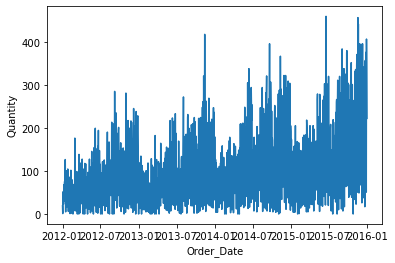

In [82]:
sns.lineplot(x="Order_Date", y="Quantity", data=Inventory1)
plt.show()

In [83]:
#There is seasonality and to understand it better I will aggregate the inventory monthly
Inventory2 = Inventory.resample('M').sum()

In [84]:
Inventory2.head()

,Quantity,Sales,Profit,Discount
Order_Date,,,,
2012-01-31,1463,98898.53,8321.76,68.758
2012-02-29,1401,103718.01,14323.02,58.192
2012-03-31,1745,135746.52,13089.59,74.272
2012-04-30,1934,114332.99,13211.11,74.782
2012-05-31,2167,158228.35,14644.10,87.472


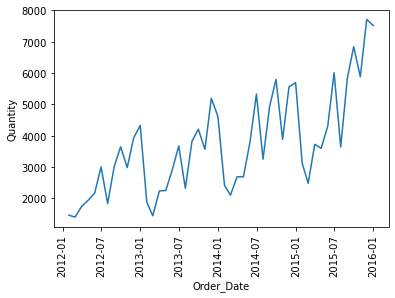

In [86]:
sns.lineplot(x="Order_Date", y="Quantity", data=Inventory2)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#There is an increase in order at year end which is essentially the holidays